Q1.)

NCR 709
Bangalore 635
Mumbai 449


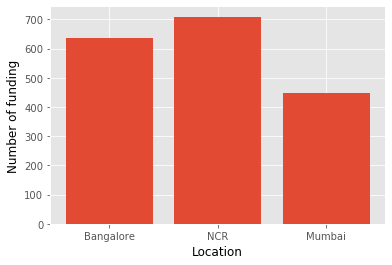

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(["ggplot"])

data = pd.read_csv("startup_funding.csv")

location = data["CityLocation"]
location.dropna(inplace = True)

# Making corrections in the spellins.
location = location.replace(["bangalore","Delhi"],["Bangalore","New Delhi"])
location = location.str.split("/",expand = True)[0].str.strip()

# Replacing New Delhi,Gurgaon and Noida with NCR.
location = location.replace(["New Delhi","Gurgaon","Noida"] , ["NCR","NCR","NCR"])

# Forming a dictionary of the 3 locations needed.
loc = {}
loc["Bangalore"] = location.value_counts()["Bangalore"]
loc["NCR"] = location.value_counts()["NCR"]
loc["Mumbai"] = location.value_counts()["Mumbai"]

# Printing the locations in order.
keys = sorted(loc,key = loc.get,reverse = True)
for i in keys:
    print(i,loc[i])
    
# Plotting the bar graph
plt.bar(loc.keys(),loc.values())
plt.xlabel("Location",c='k')
plt.ylabel("Number of funding",c= 'k')
plt.show()


Q2.)

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


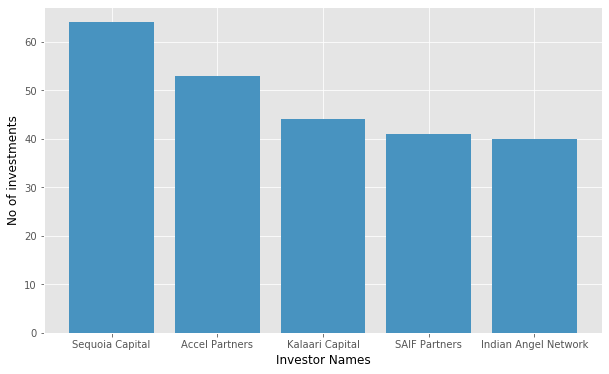

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(["ggplot"])
plt.figure(figsize=(10, 6))

data = pd.read_csv("startup_funding.csv")

investors = data["InvestorsName"]
investors.dropna(inplace = True)

# Getting rid of rows with Undisclosed Investors.
investors = investors[investors != "Undisclosed Investors"]
investors = investors[investors != "Undisclosed investors"]
investors = investors[investors != "undisclosed investors"]

# Handling multiple investors for a startup by making a dictionary.
def createDict(array):
    d = {}
    for i in array:
        if "," not in i:
            if i in d:
                d[i]+= 1
            else:
                d[i] = 1
        else:
            s = i.strip().split(",")
            for j in s:
                if j.strip() in d:
                    d[j.strip()]+= 1
                else:
                    d[j.strip()] = 1
    return d

dictionary = createDict(investors)

# Sorting by values and making list of keys and values to be used to make the bar graph.
sorted_keys = sorted(dictionary,key = dictionary.get ,reverse = True)[:5]
sorted_values = [dictionary[i] for i in sorted_keys]

# Printing the top 5 investor names.
for i in sorted_keys:
    print(i)

# Plotting the bar graph
plt.bar(sorted_keys,sorted_values,color = "#4893c0")
plt.xlabel("Investor Names",c = 'k')
plt.ylabel("No of investments",c = 'k')
plt.show()


Q3.)

Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


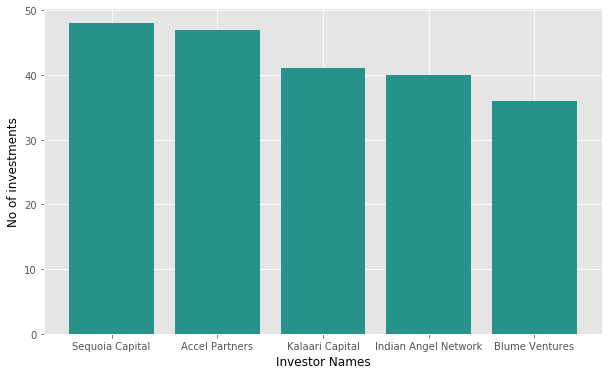

In [3]:
import pandas as pd

data = pd.read_csv("startup_funding.csv")
plt.figure(figsize=(10, 6))

# Making a dataframe of just the required columns.
inv_stp = data[["InvestorsName","StartupName"]].copy()

# Making corrections in the important startup names.
inv_stp.replace(["Oyo Rooms","OyoRooms","Oyorooms","OYO Rooms"],["Oyo","Oyo","Oyo","Oyo"],inplace = True)
inv_stp.replace(["Flipkart.com"],["Flipkart"],inplace = True)
inv_stp.replace(["Ola Cabs","Olacabs"],["Ola","Ola"],inplace = True)
inv_stp.replace(["Paytm Marketplace"],["Paytm"],inplace = True)

# Getting rid of rows which have Nan values in InvestorsName and StartupName.
inv_stp = inv_stp[inv_stp["InvestorsName"].notna()]
inv_stp = inv_stp[inv_stp["StartupName"].notna()]

# Getting rid of rows which have Undisclosed Investors.
inv_stp = inv_stp[inv_stp["InvestorsName"] != "Undisclosed Investors"]
inv_stp = inv_stp[inv_stp["InvestorsName"] != "Undisclosed investors"]
inv_stp = inv_stp[inv_stp["InvestorsName"] != "undisclosed investors"]

# Splitting for multiple investors. 
inv_stp["InvestorsName"] = inv_stp["InvestorsName"].str.split(",")

# Exploding to get individual rows for investors that were split.
inv_stp = inv_stp.explode("InvestorsName")

# Removing spaces in investor and startup names and removing rows with no investor names.
inv_stp["InvestorsName"] = inv_stp["InvestorsName"].str.strip()
inv_stp["StartupName"] = inv_stp["StartupName"].str.strip()
inv_stp = inv_stp[inv_stp["InvestorsName"] != '']

# Removing duplicate rows to handle same investor investing in a startup multiple times.
inv_stp.drop_duplicates(inplace = True)

# Making the list of top 5 investors and printing the names of the investors.
top_investors = inv_stp["InvestorsName"].value_counts().index[:5]
top_investors_count = inv_stp["InvestorsName"].value_counts().values[:5]

# Printing the top 5 investor names.
for i in top_investors:
    print(i)

# Plotting the bar graph
plt.bar(top_investors,top_investors_count,color = "#279289")
plt.xlabel("Investor Names",c = 'k')
plt.ylabel("No of investments",c = 'k')
plt.show()


Q4.)

##### Here the 5th postion is shared by Group of Angel Investors and Kunal Shah with equal number of investments so I've shown both (thus top-6.) 

If the number of investments is same for two investors then they will be shown in alphabetical order so
Group of Angel would appear before Kunal show.
But I've show both.

In the pdf I've shown the graph with Kunah Shah as it appears first in the dataframe.

Indian Angel Network
Rajan Anandan
Anupam Mittal
LetsVenture
Kunal Shah
Group of Angel Investors


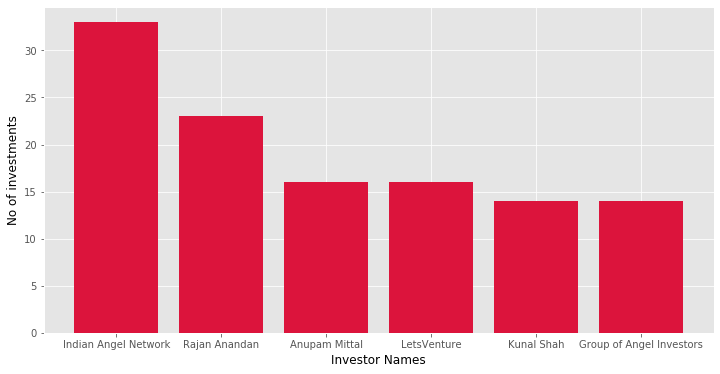

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("startup_funding.csv")
plt.figure(figsize=(12, 6))

# Making a dataframe of just the required columns.
inv_stp = data[["InvestorsName","InvestmentType","StartupName"]].copy()

# Getting rid of rows which have Nan values in InvestmentType,InvestorsName and StartupName.
inv_stp = inv_stp[inv_stp["InvestmentType"].notna()]
inv_stp = inv_stp[inv_stp["InvestorsName"].notna()]
inv_stp = inv_stp[inv_stp["StartupName"].notna()]

# Getting rid of rows which have Undisclosed Investors.
inv_stp = inv_stp[inv_stp["InvestorsName"] != "Undisclosed Investors"]
inv_stp = inv_stp[inv_stp["InvestorsName"] != "Undisclosed investors"]
inv_stp = inv_stp[inv_stp["InvestorsName"] != "undisclosed investors"]

# Making corrections in InvestmentType spellings.
inv_stp.replace(["SeedFunding","PrivateEquity","Crowd funding"],["Seed Funding","Private Equity","Crowd Funding"],inplace = True)

# Choosing only the required InvestmentType.
inv_stp = inv_stp[(inv_stp["InvestmentType"] == "Crowd Funding") | (inv_stp["InvestmentType"] == "Seed Funding")]

# Making corrections in StartupName spellings.
inv_stp.replace(["Oyo Rooms","OyoRooms","Oyorooms","OYO Rooms"],["Oyo","Oyo","Oyo","Oyo"],inplace = True)
inv_stp.replace(["Flipkart.com"],["Flipkart"],inplace = True)
inv_stp.replace(["Ola Cabs","Olacabs"],["Ola","Ola"],inplace = True)
inv_stp.replace(["Paytm Marketplace"],["Paytm"],inplace = True)

# Splitting for multiple investors. 
inv_stp["InvestorsName"] = inv_stp["InvestorsName"].str.split(",")

# Exploding to get individual rows for investors that were split.
inv_stp = inv_stp.explode("InvestorsName")

# Removing spaces in investor and startup names and removing rows with no investor names.
inv_stp["InvestorsName"] = inv_stp["InvestorsName"].str.strip()
inv_stp = inv_stp[inv_stp["InvestorsName"] != '']
inv_stp["StartupName"] = inv_stp["StartupName"].str.strip()

# Removing duplicate rows to handle same investor investing in a startup multiple times.
inv_stp.drop_duplicates(inplace = True)

inv_stp.reset_index()

# Making the list of top 5 investors and printing the names of the investors.
top_investors = inv_stp["InvestorsName"].value_counts().index[:6]
top_investors_count = inv_stp["InvestorsName"].value_counts().values[:6]

# # Printing the top 5 investor names.
for i in top_investors:
    print(i)
# inv_stp["InvestorsName"].value_counts()[:10]
# # Plotting the bar graph
plt.bar(top_investors,top_investors_count,color = "#DC143C")
plt.xlabel("Investor Names",c = 'k')
plt.ylabel("No of investments",c = 'k')
plt.show()




Q5.)

Sequoia Capital
Accel Partners
Kalaari Capital
Blume Ventures
SAIF Partners


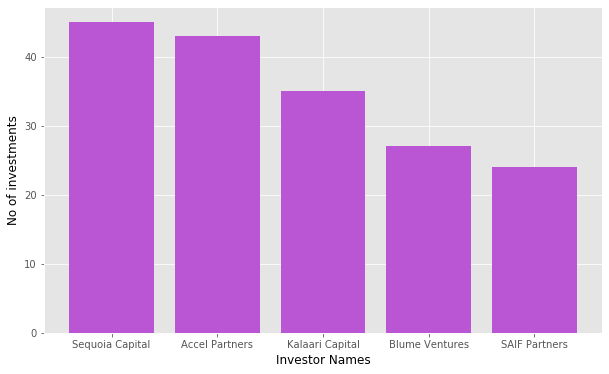

In [5]:
import pandas as pd

data = pd.read_csv("startup_funding.csv")
plt.figure(figsize=(10, 6))

# Making a dataframe of just the required columns.
inv_stp = data[["InvestorsName","InvestmentType","StartupName"]].copy()

# Getting rid of rows which have Nan values in InvestmentType,InvestorsName and StartupName.
inv_stp = inv_stp[inv_stp["InvestmentType"].notna()]
inv_stp = inv_stp[inv_stp["InvestorsName"].notna()]
inv_stp = inv_stp[inv_stp["StartupName"].notna()]

# Getting rid of rows which have Undisclosed Investors.
inv_stp = inv_stp[inv_stp["InvestorsName"] != "Undisclosed Investors"]
inv_stp = inv_stp[inv_stp["InvestorsName"] != "Undisclosed investors"]
inv_stp = inv_stp[inv_stp["InvestorsName"] != "undisclosed investors"]

# Making corrections in InvestmentType spellings.
inv_stp.replace(["SeedFunding","PrivateEquity","Crowd funding"],["Seed Funding","Private Equity","Crowd Funding"],inplace = True)

# Choosing only the required InvestmentType.
inv_stp = inv_stp[(inv_stp["InvestmentType"] == "Private Equity")]

# Making corrections in StartupName spellings.
inv_stp.replace(["Oyo Rooms","OyoRooms","Oyorooms","OYO Rooms"],["Oyo","Oyo","Oyo","Oyo"],inplace = True)
inv_stp.replace(["Flipkart.com"],["Flipkart"],inplace = True)
inv_stp.replace(["Ola Cabs","Olacabs"],["Ola","Ola"],inplace = True)
inv_stp.replace(["Paytm Marketplace"],["Paytm"],inplace = True)

# Splitting for multiple investors. 
inv_stp["InvestorsName"] = inv_stp["InvestorsName"].str.split(",")

# Exploding to get individual rows for investors that were split.
inv_stp = inv_stp.explode("InvestorsName")

# Removing spaces in investor and startup names and removing rows with no investor names.
inv_stp["InvestorsName"] = inv_stp["InvestorsName"].str.strip()
inv_stp = inv_stp[inv_stp["InvestorsName"] != '']
inv_stp["StartupName"] = inv_stp["StartupName"].str.strip()

# Removing duplicate rows to handle same investor investing in a startup multiple times.
inv_stp.drop_duplicates(inplace = True)

# Making the list of top 5 investors and printing the names of the investors.
top_investors = inv_stp["InvestorsName"].value_counts().index[:5]
top_investors_count = inv_stp["InvestorsName"].value_counts().values[:5]

# Printing the top 5 investor names.
for i in top_investors:
    print(i)

# Plotting the bar graph
plt.bar(top_investors,top_investors_count,color = "#BA55D3")
plt.xlabel("Investor Names",c = 'k')
plt.ylabel("No of investments",c = 'k')
plt.show()
